In [1]:
import os
import getpass

api_key = getpass.getpass("Enter OPENAI_API_KEY: ")
os.environ['OPENAI_API_KEY'] = api_key

/opt/anaconda3/envs/dhlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


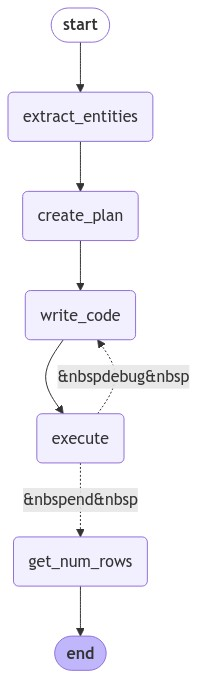

In [2]:
from IPython.display import Image, display
from agent import graph
from utils.utils import extract_content

# Visualize the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
import pandas as pd

# Read Sample question
questions = pd.read_csv('data/questions_sql.csv')
sample_question = questions.iloc[10]

print(sample_question['question'])

Could you enumerate all individuals who possess ownership of properties?


In [4]:
from utils.utils import get_openai_llm

# Initialize the OpenAI model
llm = get_openai_llm(seed=42)

In [5]:
# Run the graph
final_state = graph.invoke({
    "llm": llm,
    "question": sample_question['question'],
    "answer_format": sample_question['answer_format'],
    "num_steps": 0
})

<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
print('*** References ***')
print(final_state['references'], end='\n\n')

print('*** Entities ***')
print(final_state['entities'], end='\n\n')

print('*** Plan ***')
print(final_state['plan'], end='\n\n')

print('*** Code ***')
print(final_state['code'], end='\n\n')

print('*** Answer ***', end='\n\n')
print(final_state['code_output'], end='\n\n')

print('*** Information Score ***')
print(final_state['num_rows'], end='\n\n')

*** References ***
[{'individuals': {'dataset': 'data/buildings_1740.csv', 'column': 'owner_first_name'}}, {'individuals': {'dataset': 'data/buildings_1740.csv', 'column': 'owner_family_name'}}, {'individuals': {'dataset': 'data/buildings_1808.csv', 'column': 'owner_first_name'}}, {'individuals': {'dataset': 'data/buildings_1808.csv', 'column': 'owner_family_name'}}]

*** Entities ***
[]

*** Plan ***
To answer the question regarding the enumeration of individuals who possess ownership of properties in Venice, we will follow a structured data analysis plan utilizing the provided datasets. Here’s a step-by-step outline:

1. **Identify Relevant Datasets**: 
   - We know that ownership information is contained in both the 1740 Buildings Dataset and the 1808 Buildings Dataset. Specifically, we are interested in the columns that contain the first names and family names of the owners.

2. **Extract Owner Names from 1740 Dataset**:
   - Open the 1740 Buildings Dataset (`data/buildings_1740.cs

In [7]:
print("Answer: ", extract_content(final_state['code_output']))
print("Information Score: ", extract_content(final_state['num_rows']))

Answer:   giorgio spiridon conomo, abate don lorenzo maria balbi, abbate francesco cappelo, abbondio rezzonico d., abondio ressonico, abondio rezzonico, abondio vinanti, abram bacchi, abram bachi, abram brache', abram capon, abram dalla gianeva, abram di mazo, abram ferro, abram luzato, abram mazzo, abram moise parenzo, abram parenzo cividal zemel, abram treza, abram vita polacco, abram vitta saraval, abramo bacchi, abramo bachi, abramo gentili, abramo lunigo, abramo malta, abramo pacifico, abreo muja, abundio rezzonico, adelaide galico santorio, adelaide longo diedo, adelajde diedo, adeliade galico santorio, adeodato frizele, adolfo balbi, adolfo vanasel giusto, adolfo vanaxel giusto, adolfo vansel castelli giusto, adriana dadie, adriana mostari, adriana notari, adriano solimbergo, agata cero, agense gradenigo, agnese bane, agnese bembo, agnese cattarina velerio, agnese david, agnese dieda barbaro balbi, agnese dona', agnese dona' zane, agnese donà, agnese donà zane, agnese giustinian